In [1]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [2]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("data/train.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("data/test.csv")
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
# Same thing as train and test dataset
submission = pd.read_csv("data/sampleSubmission.csv")
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [9]:
#Train a model using AutoGluon’s Tabular Prediction
# Requirements:
# We are prediting count, so it is the label we are setting.
# Ignore casual and registered columns as they are also not present in the test dataset.
# Use the root_mean_squared_error as the metric to use for evaluation.
# Set a time limit of 10 minutes (600 seconds).
# Use the preset best_quality to focus on creating the best model.

features = ["datetime", "season", "holiday", "weather", "temp", "atemp", "humidity", "windspeed", "count"]

predictor = TabularPredictor(label="count", 
                             eval_metric="root_mean_squared_error").fit(train_data=train[features], 
                                                                        time_limit=600, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230126_132940/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230126_132940/"
AutoGluon Version:  0.5.2
Python Version:     3.9.7
Operating System:   Darwin
Train Data Rows:    10886
Train Data Columns: 8
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator..

Detailed Traceback:
Traceback (most recent call last):
  File "/Users/wiktoriatwarog/Library/Python/3.9/lib/python/site-packages/autogluon/core/trainer/abstract_trainer.py", line 1126, in _train_and_save
    model = self._train_single(X, y, model, X_val, y_val, **model_fit_kwargs)
  File "/Users/wiktoriatwarog/Library/Python/3.9/lib/python/site-packages/autogluon/core/trainer/abstract_trainer.py", line 1083, in _train_single
    model = model.fit(X=X, y=y, X_val=X_val, y_val=y_val, **model_fit_kwargs)
  File "/Users/wiktoriatwarog/Library/Python/3.9/lib/python/site-packages/autogluon/core/models/abstract/abstract_model.py", line 587, in fit
    out = self._fit(**kwargs)
  File "/Users/wiktoriatwarog/Library/Python/3.9/lib/python/site-packages/autogluon/core/models/ensemble/stacker_ensemble_model.py", line 154, in _fit
    return super()._fit(X=X, y=y, time_limit=time_limit, **kwargs)
  File "/Users/wiktoriatwarog/Library/Python/3.9/lib/python/site-packages/autogluon/core/models/ensembl

Fitting model: RandomForestMSE_BAG_L2 ... Training model for up to 207.22s of the 207.21s of remaining time.
	-53.0923	 = Validation score   (-root_mean_squared_error)
	3.83s	 = Training   runtime
	0.44s	 = Validation runtime
Fitting model: CatBoost_BAG_L2 ... Training model for up to 202.48s of the 202.47s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-55.4339	 = Validation score   (-root_mean_squared_error)
	25.79s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L2 ... Training model for up to 176.63s of the 176.62s of remaining time.
	-53.7334	 = Validation score   (-root_mean_squared_error)
	1.3s	 = Training   runtime
	0.43s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L2 ... Training model for up to 174.43s of the 174.42s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-51.9156	 = Validation score   (-root_mean_sq

Completed 1/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L3 ... Training model for up to 360.0s of the 5.06s of remaining time.
	-50.6913	 = Validation score   (-root_mean_squared_error)
	0.21s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 595.17s ... Best model: "WeightedEnsemble_L3"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20230126_132940/")


In [10]:
#Review AutoGluon's training run with ranking of models that did the best.
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -50.691256       2.116706  449.996436                0.000427           0.209816            3       True         14
1   NeuralNetFastAI_BAG_L2  -51.915623       1.240412  444.653044                0.171506          55.360595            2       True         12
2   RandomForestMSE_BAG_L2  -53.092335       1.512936  393.124563                0.444030           3.832115            2       True          9
3     ExtraTreesMSE_BAG_L2  -53.733448       1.500743  390.593910                0.431837           1.301462            2       True         11
4          CatBoost_BAG_L2  -55.433940       1.087984  415.080671                0.019078          25.788223            2       True         10
5    NeuralNetTorch_BAG_L2  -58.065027       1.224421  502.682383         

/Users/wiktoriatwarog/Library/Python/3.9/lib/python/site-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'NeuralNetTorch_BAG_L2': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.58817625927213,
  'KNeighborsDist_BAG_L1': -84.14642264302962,
  'RandomForestMSE_BAG_L1': -116.54718986557872,
  '

<AxesSubplot: xlabel='model'>

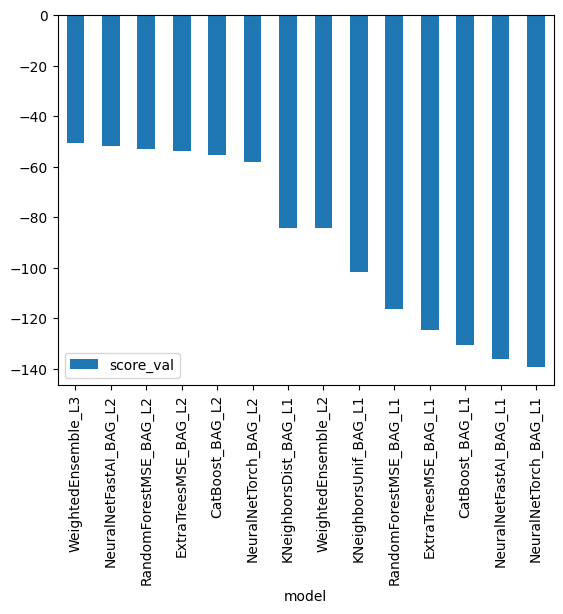

In [11]:
# Output the model's `score_val` in a bar chart to compare performance
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [14]:
#Create predictions from test dataset
predictions = predictor.predict(test)
predictions.head()

0    26.402977
1    41.734352
2    46.666351
3    48.387077
4    50.785759
Name: count, dtype: float32

In [15]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean       99.387764
std        88.365654
min         1.751948
25%        19.449659
50%        66.693848
75%       164.761902
max       357.666748
Name: count, dtype: float64

In [16]:
# How many negative values do we have?
(predictions < 0).any().any()

False

In [18]:
#Set predictions to submission dataframe, save, and submit
submission["count"] = predictions
submission.to_csv("results/submission.csv", index=False)

In [ ]:
# Initial score of 1.81687